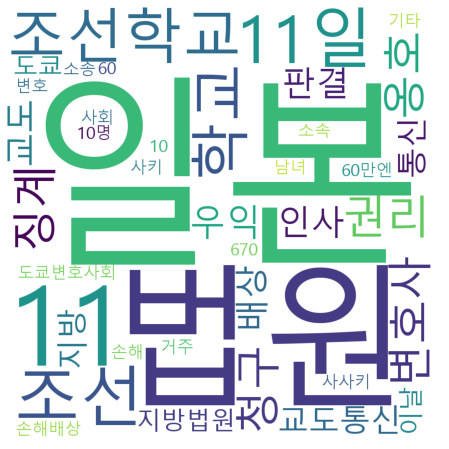

In [39]:
import feedparser
import newspaper
#pip install parser
#pip3 install newspaper3k
from konlpy.tag import Kkma
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
feeds = feedparser.parse('http://media.daum.net/syndication/today_sisa.rss')
links = [entry['link'] for entry in feeds['entries']]

from tqdm import tqdm_notebook
news_text = ''
for link in tqdm_notebook(links):
    article = newspaper.Article(links[0], language='ko')
    article.download()
    article.parse()
    news_text += article.text

kkma = Kkma()
nouns = kkma.nouns(news_text)
nouns = [n for n in nouns if len(n)>1]
count = Counter(nouns)
tags = count.most_common(40)
wc = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
    background_color='white', width=900, height=900)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()